In [3]:
# ============================================
# 📓 Regression for Pharmacy Students (Full)
# ============================================

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression

sns.set_style("whitegrid")


# Part 1 — Intuition: What is Regression?

As pharmacists, you collect data:

- Drug doses
- Patient age
- Blood pressure
- Side effects

You want to answer:  
**“Is there any relationship between my variables?”**

---

## What Regression Does:

Regression finds a relationship between:

- Inputs (predictors, independent variables)
- Outcome (dependent variable)

It estimates:

- How much outcome changes if predictor changes.
- The strength of this relationship.

---

| Regression Type | Use When | Example |
| ---------------- | -------- | ------- |
| Linear Regression | Outcome is a number | Predict blood pressure |
| Logistic Regression | Outcome is yes/no | Predict side effects |


# Part 2 — Linear Regression

## Key Idea: Linear Regression

- **Model formula:**  
  `Y = a + bX + error`
  
Where:

- Y = outcome
- X = predictor
- `a` = intercept (value of Y when X = 0)
- `b` = slope (how much Y changes for 1 unit of X)

## 🧪 Example 1: Dose vs Blood Pressure
You collected data from 10 patients:

In [4]:
# Data preparation
dose = np.array([10,20,30,40,50,60,70,80,90,100])
bp = np.array([140,135,132,128,125,120,118,115,112,110])

df = pd.DataFrame({'dose': dose, 'bp': bp})
df

,dose,bp
0,10,140
1,20,135
2,30,132
3,40,128
4,50,125
5,60,120
6,70,118
7,80,115
8,90,112
9,100,110


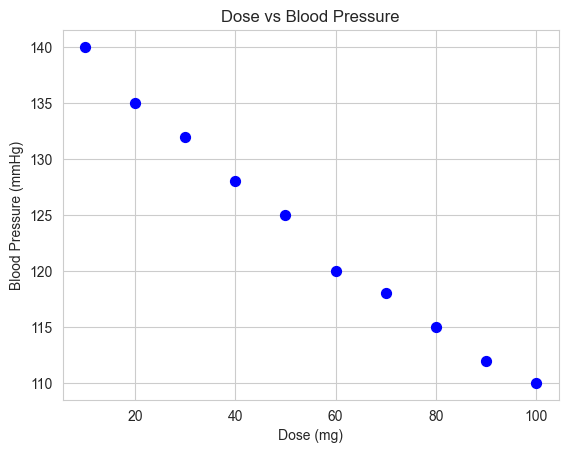

In [5]:
# Scatter plot
plt.scatter(df['dose'], df['bp'], c='blue', s=50)
plt.title("Dose vs Blood Pressure")
plt.xlabel("Dose (mg)")
plt.ylabel("Blood Pressure (mmHg)")
plt.show()

In [6]:
# Reshape X because sklearn expects 2D array for features
X = df[['dose']]   # note: double bracket makes it a DataFrame (2D)
y = df['bp']

# Create model and fit
model = LinearRegression()
model.fit(X, y)

# Get slope and intercept
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

Intercept: 141.86666666666667
Slope: -0.3339393939393939


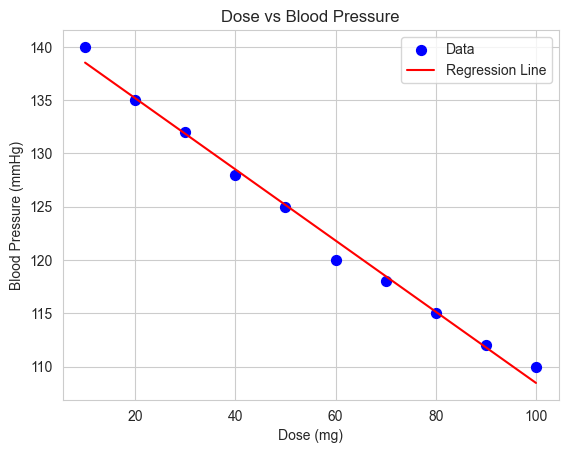

In [7]:
# Plot with regression line
plt.scatter(df['dose'], df['bp'], c='blue', s=50, label='Data')
plt.plot(df['dose'], model.predict(X), color='red', label='Regression Line')
plt.title("Dose vs Blood Pressure")
plt.xlabel("Dose (mg)")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend()
plt.show()


### Interpretation:
- Intercept: predicted BP at dose = 0
- Slope: how much BP changes per mg increase
- p-value: is slope statistically significant?
- R²: how well model fits the data (0 = bad fit, 1 = perfect fit)

## 🧪 Example 2: Multiple Predictors (Dose + Weight)
Suppose now you also measure patient weight.

In [8]:
# Adding weight data
weight = np.array([70,72,74,76,78,80,82,84,86,88])
df2 = pd.DataFrame({'dose': dose, 'weight': weight, 'bp': bp})
df2

,dose,weight,bp
0,10,70,140
1,20,72,135
2,30,74,132
3,40,76,128
4,50,78,125
5,60,80,120
6,70,82,118
7,80,84,115
8,90,86,112
9,100,88,110


In [9]:
# Feature matrix: multiple predictors
X2 = df2[['dose', 'weight']]  # no need to add constant

# Target variable
y2 = df2['bp']

# Create model and fit
model2 = LinearRegression()
model2.fit(X2, y2)

# Get intercept and coefficients
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

# Optional: nicely print coefficients
for feature, coef in zip(X2.columns, model2.coef_):
    print(f"{feature}: {coef}")


Intercept: 146.23356643356644
Coefficients: [-0.32109557 -0.06421911]
dose: -0.32109557109557113
weight: -0.0642191142191142


### Interpretation of Multiple Regression (Dose + Weight)

- The model includes two predictors: Dose and Weight.
- Each coefficient represents the **change in BP** per unit change in that variable, **holding the other constant**.

- For example:
  - If the coefficient of `dose` is -0.3, it means:
    > *For every 1 mg increase in dose, BP is expected to decrease by 0.3 mmHg, assuming weight remains constant.*

- If the coefficient of `weight` is also negative (e.g. -0.5), it means:
    > *Heavier patients tend to have lower BP, after accounting for dose.*

- The plot above shows the predicted relationship between dose and BP **with weight fixed** at the average.

## Quick Recap Table:

| Term | Meaning |
| ---- | ------- |
| Intercept | BP when all predictors = 0 |
| Coefficient | Change in BP per 1 unit increase in predictor |
| p-value | Whether the predictor has significant effect |
| R² | Overall fit of the model |


# Part 3 — Logistic Regression

## Key Idea: Logistic Regression

- Used when outcome is yes/no, 0/1, success/failure
- Models probability of event happening
- Internally works with **log-odds**, but we interpret probabilities


## 🧪 Example 3: Age vs Side Effects
You collected this data:

In [11]:
age = np.array([25,30,35,40,45,50,55,60])
side_effect = np.array([0,0,0,1,1,1,1,1])

df3 = pd.DataFrame({'age': age, 'side_effect': side_effect})
df3

,age,side_effect
0,25,0
1,30,0
2,35,0
3,40,1
4,45,1
5,50,1
6,55,1
7,60,1


In [12]:
# scikit-learn expects 2D feature matrix
X3 = df3[['age']]   # no need for add_constant
y3 = df3['side_effect']

# Create model and fit
model3 = LogisticRegression(solver='liblinear')
model3.fit(X3, y3)

# Coefficients
print(f"Intercept: {model3.intercept_[0]}")
print(f"Slope (age): {model3.coef_[0][0]}")


Intercept: -0.6919407418625259
Slope (age): 0.03847805327703253


In [13]:
# Predict probability of side effect (class 1)
df3['predicted_prob'] = model3.predict_proba(X3)[:, 1]
df3

,age,side_effect,predicted_prob
0,25,0,0.567096
1,30,0,0.613584
2,35,0,0.658089
3,40,1,0.699976
4,45,1,0.738767
5,50,1,0.774162
6,55,1,0.806020
7,60,1,0.834345


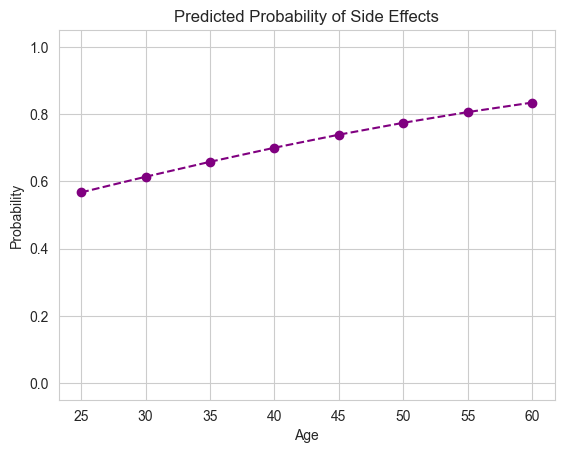

In [14]:
# Plot predicted probabilities
plt.plot(df3['age'], df3['predicted_prob'], marker='o', linestyle='--', color='purple')
plt.title("Predicted Probability of Side Effects")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.ylim(-0.05, 1.05)
plt.show()


### Interpretation:
- Coefficient: change in log-odds per year increase
- exp(coefficient): odds ratio
- p-value: whether predictor is significant

## 🧪 Example 4: Logistic Regression with Multiple Predictors
Now you collect both Age and Dose.

In [15]:
dose_new = np.array([10,15,20,25,30,35,40,45])
age_new = np.array([25,30,35,40,45,50,55,60])
side_effect_new = np.array([0,0,0,1,1,1,1,1])

df4 = pd.DataFrame({'age': age_new, 'dose': dose_new, 'side_effect': side_effect_new})
df4

,age,dose,side_effect
0,25,10,0
1,30,15,0
2,35,20,0
3,40,25,1
4,45,30,1
5,50,35,1
6,55,40,1
7,60,45,1


In [16]:
# Prepare feature matrix (no need to add constant)
X4 = df4[['age', 'dose']]
y4 = df4['side_effect']

# Fit logistic regression
model4 = LogisticRegression(solver='liblinear')
model4.fit(X4, y4)

# Print intercept and coefficients
print(f"Intercept: {model4.intercept_[0]}")
for feature, coef in zip(X4.columns, model4.coef_[0]):
    print(f"{feature}: {coef}")


Intercept: -0.09044384587607741
age: -0.5045233363325345
dose: 0.852134351808628


In [17]:
# Predict probability of side effect (class 1)
df4['predicted_prob'] = model4.predict_proba(X4)[:, 1]
df4

,age,dose,side_effect,predicted_prob
0,25,10,0,0.015036
1,30,15,0,0.079869
2,35,20,0,0.330467
3,40,25,1,0.737300
4,45,30,1,0.941035
5,50,35,1,0.989101
6,55,40,1,0.998066
7,60,45,1,0.999659


# Part 4 — Summary & Wrap-Up

✅ When to use which:

| Type | Use Case |
| ---- | -------- |
| Linear | Continuous outcomes (BP, cholesterol, weight) |
| Logistic | Yes/No outcomes (side effect, disease present/absent) |

✅ Why regression matters in pharmacy:

- Clinical studies
- Dose-response analysis
- Risk assessment
- Predictive modeling for personalized medicine

🎯 You don't need to memorize formulas.
Focus on:

- Picking correct model type
- Interpreting output meaningfully
- Understanding how variables are related.